In [1]:
from sklearn.datasets import load_wine

In [2]:
data = load_wine()
data.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [3]:
X = data.data
y = data.target
labels = data.target_names
features = data.feature_names

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
#constructing a dataframe from data
df = pd.DataFrame(
    data=X, columns=features
)
df["quality"] = y

In [6]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,quality
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [7]:
df.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
quality                         0
dtype: int64

In [8]:
df.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
quality                           int32
dtype: object

In [9]:
num_per_f = df.nunique()
num_per_f  #these are high multi-output or continous (except for quality)

alcohol                         126
malic_acid                      133
ash                              79
alcalinity_of_ash                63
magnesium                        53
total_phenols                    97
flavanoids                      132
nonflavanoid_phenols             39
proanthocyanins                 101
color_intensity                 132
hue                              78
od280/od315_of_diluted_wines    122
proline                         121
quality                           3
dtype: int64

In [10]:
df.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,quality
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,0


<AxesSubplot:title={'center':'Bad heatmap'}>

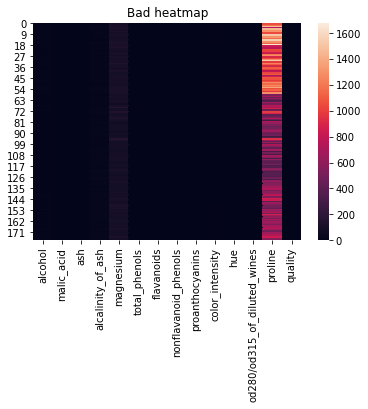

In [11]:
#The problem: proline values are too high;
#therefore, the cbar relative scale is abnormally high
plt.title("Bad heatmap")
sns.heatmap(
    df
)

In [12]:
df.sum()

alcohol                           2314.110000
malic_acid                         415.870000
ash                                421.240000
alcalinity_of_ash                 3470.100000
magnesium                        17754.000000
total_phenols                      408.530000
flavanoids                         361.210000
nonflavanoid_phenols                64.410000
proanthocyanins                    283.180000
color_intensity                    900.339999
hue                                170.426000
od280/od315_of_diluted_wines       464.880000
proline                         132947.000000
quality                            167.000000
dtype: float64

In [13]:
temp_df = df.copy()

In [14]:
trform_feat = ['proline', 'magnesium', 'alcohol', 'alcalinity_of_ash']
temp_df[trform_feat] = df[trform_feat].apply(lambda x: np.log(x))

In [15]:
temp_df.sum()

alcohol                          456.222167
malic_acid                       415.870000
ash                              421.240000
alcalinity_of_ash                526.018459
magnesium                        817.561478
total_phenols                    408.530000
flavanoids                       361.210000
nonflavanoid_phenols              64.410000
proanthocyanins                  283.180000
color_intensity                  900.339999
hue                              170.426000
od280/od315_of_diluted_wines     464.880000
proline                         1162.393891
quality                          167.000000
dtype: float64

<AxesSubplot:title={'center':'Nicer heatmap'}>

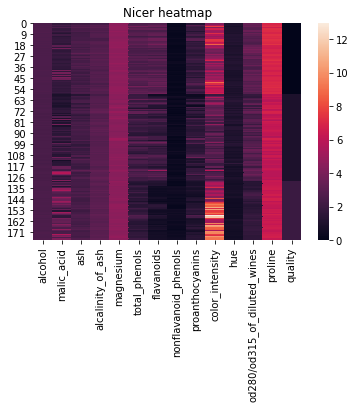

In [16]:
plt.title("Nicer heatmap")
sns.heatmap(
    temp_df
)

In [17]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 10)
mpl.rcParams['figure.edgecolor'] = "magenta"
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

<AxesSubplot:title={'center':'Correlation visualization of the dataset'}>

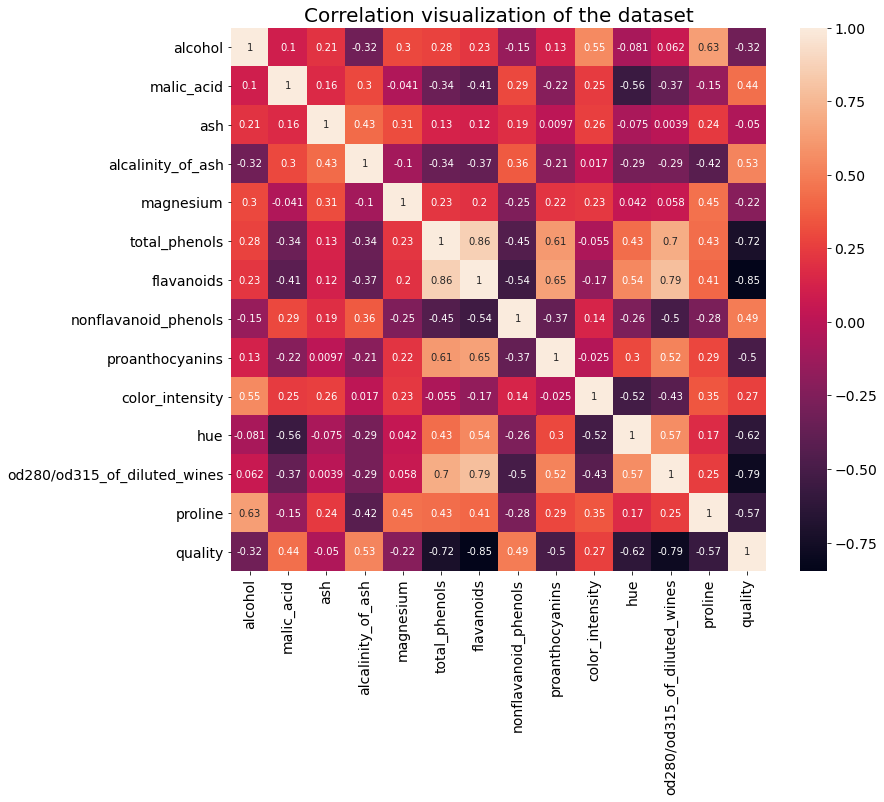

In [18]:
#of course, df works fine with corr, as relative vals are the same
plt.title("Correlation visualization of the dataset", size=20)
sns.heatmap(
    temp_df.corr(),
    annot=True
)

Conclusions from above:

    -> Quality is correlated with: color_intensity, nonflav_phen, alcalinity_ash, malic_acid
    methodology to understanding features positively correlated with quality-> find correlations of eachother
    
    color_intensity:
        ->nonflav_phen is 0.14, malic is 0.25, alcalinity is low (0.017), so alcalinity should probably be separate
        
    alcalinity:
        ->nonflav_phen is 0.36, malic is 0.3
        
    nonflav_phen is 0.29 with malic.

In [19]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,quality
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [20]:
df.filter(regex='y$').head()

,color_intensity,quality
0,5.64,0
1,4.38,0
2,5.68,0
3,7.80,0
4,4.32,0


### start creating pipeline and validation folds

In [21]:
pred = 'quality'
X = df.drop(columns=[pred]).values
y = df.filter(items=[pred]).values

In [22]:
idcs = np.arange(0, X.shape[0])
np.random.shuffle(idcs)
X_, y_ = X.copy(), y.copy()
X = X[idcs]
y = y[idcs]

In [23]:
### Create many folds of indices
from sklearn.model_selection import StratifiedKFold

train_folds = dict()
test_folds = dict()

skf = StratifiedKFold(n_splits=3, shuffle=True)
#I'm not using enumerate to get curr. index
idx = 1
for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    print('\n')
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    train_folds[f"train_{idx}"] = train_index
    test_folds[f"test_{idx}"] = test_index
    idx+=1

TRAIN: [  1   2   3   5   6   7   8   9  10  14  15  18  19  20  22  23  25  26
  28  30  31  32  33  34  35  37  38  41  43  44  46  47  48  49  50  51
  52  53  55  56  57  58  60  61  62  63  64  65  66  67  68  69  71  72
  73  76  77  78  79  80  81  82  87  89  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 106 108 109 110 111 112 113 114 116 117 118 124
 125 127 129 130 131 135 139 140 141 144 146 147 149 150 151 155 158 159
 161 162 163 164 168 169 171 173 175 177] TEST: [  0   4  11  12  13  16  17  21  24  27  29  36  39  40  42  45  54  59
  70  74  75  83  84  85  86  88  90 105 107 115 119 120 121 122 123 126
 128 132 133 134 136 137 138 142 143 145 148 152 153 154 156 157 160 165
 166 167 170 172 174 176]


TRAIN: [  0   2   4   7   8   9  10  11  12  13  14  15  16  17  21  22  23  24
  26  27  29  30  34  36  38  39  40  41  42  44  45  48  49  50  54  55
  57  58  59  60  61  63  65  66  70  73  74  75  77  78  79  80  83  84
  85  86  88  89  90  91  93  94  

In [24]:
### Warning! train_1 has one less sample than train_2 and train_3
train_folds

{'train_1': array([  1,   2,   3,   5,   6,   7,   8,   9,  10,  14,  15,  18,  19,
         20,  22,  23,  25,  26,  28,  30,  31,  32,  33,  34,  35,  37,
         38,  41,  43,  44,  46,  47,  48,  49,  50,  51,  52,  53,  55,
         56,  57,  58,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
         71,  72,  73,  76,  77,  78,  79,  80,  81,  82,  87,  89,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        106, 108, 109, 110, 111, 112, 113, 114, 116, 117, 118, 124, 125,
        127, 129, 130, 131, 135, 139, 140, 141, 144, 146, 147, 149, 150,
        151, 155, 158, 159, 161, 162, 163, 164, 168, 169, 171, 173, 175,
        177]),
 'train_2': array([  0,   2,   4,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,
         17,  21,  22,  23,  24,  26,  27,  29,  30,  34,  36,  38,  39,
         40,  41,  42,  44,  45,  48,  49,  50,  54,  55,  57,  58,  59,
         60,  61,  63,  65,  66,  70,  73,  74,  75,  77,  78,  79,  80,
         83,  

In [25]:
higher = (df.sum() > 1000).values
high_vals = []
for i, trth in enumerate(higher):
    if trth:
        high_vals.append(df.columns[i])
high_vals

['alcohol', 'alcalinity_of_ash', 'magnesium', 'proline']

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

higher_transformer = Pipeline(steps=[
    ('compresser', StandardScaler()),
])
###If you are going to use ColumnTransformer, make sure to fit the main pipeline
###with a pandas dataframe (and not simply numpy values)
preprocessor = ColumnTransformer(
   transformers=[
    ('compress', higher_transformer, high_vals)
]) 

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC

pipeline = Pipeline(steps = [
            ('preprocessor', preprocessor),
            ('model1', SVC())
           ])

In [100]:
X_train1 = df.iloc[train_folds['train_1']].drop(columns=[pred])
X_test1 = df.iloc[test_folds['test_1']].drop(columns=[pred])
y_train1 = df.iloc[train_folds['train_1']][pred].values
y_test1 = df.iloc[test_folds['test_1']][pred].values

In [104]:
print("number of samples for training shape:", y_train1.shape[0])
X_train1.head()

number of samples for training shape: 118


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0


In [105]:
pipeline.fit(X_train1, y_train1)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('compress',
                                                  Pipeline(steps=[('compresser',
                                                                   StandardScaler())]),
                                                  ['alcohol',
                                                   'alcalinity_of_ash',
                                                   'magnesium', 'proline'])])),
                ('model1', SVC())])

In [106]:
pipeline.predict(X_test1)

array([0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2])

### let's evaluate our pipeline

In [132]:
X_train2 = df.iloc[train_folds['train_2']].drop(columns=[pred])
X_test2 = df.iloc[test_folds['test_2']].drop(columns=[pred])
y_train2 = df.iloc[train_folds['train_2']][pred].values
y_test2 = df.iloc[test_folds['test_2']][pred].values

X_train3 = df.iloc[train_folds['train_3']].drop(columns=[pred])
X_test3 = df.iloc[test_folds['test_3']].drop(columns=[pred])
y_train3 = df.iloc[train_folds['train_3']][pred].values
y_test3 = df.iloc[test_folds['test_3']][pred].values

In [133]:
from sklearn.metrics import accuracy_score, precision_score,\
recall_score, f1_score

#remember: y_true to y_pred
def valScores(estimator, X, y):
    weighted = (0, 0, 0, 0)
    total = (0, 0, 0, 0)
    for i in range(len(X)):
        X_fold = X[i]
        y_fold = y[i]
        acc = accuracy_score(y_fold, estimator.predict(X_fold))
        prec = precision_score(y_fold, estimator.predict(X_fold), average="macro")
        recall = recall_score(y_fold, estimator.predict(X_fold), average="macro")
        f1 = f1_score(y_fold, estimator.predict(X_fold), average="macro")
        if i==0:
            weighted = (acc, prec, recall, f1)
            continue
        weighted[0] += acc
        weighted[1] += prec
        weighted[2] += recall
        weighted[3] += f1
    return weighted

valScores(pipeline, [X_test1], [y_test1])

(0.8166666666666667, 0.8435897435897436, 0.8230605285592497, 0.82449960316166)